## 연속형 확률 변수
- 확률변수가 취할 수 있는 값이 연속적인 확률변수
- 특정 값을 취하는 확률은 정의되지 않음
- 확률변수가 어느 구간에 들어가는가에 대한 확률을 정의

- [예] 룰렛 :
    - 취할 수 있는 값이 0부터 1사이의 실수
    - 큰 수이면 나오기 쉬어지는 불공정한 구조
    - 0.5라는 값을 취할 확률 0
    - 정확하게 0.500000...을 취할 가능성을 없을므로 확률은 0ㅡ

## 확률 밀도 함수
- 확률 변수가 취할 수 있는 값은 구간[a,b]
- 확률 밀도함수 (PDF) 또는 밀도함수 f(X)로 정의
- 어떤 특정 값을 취하는 확률로는 정의되지 않음
    - 𝑓(𝑥) ≠𝑃(𝑋=𝑥)
![](../picture/밀도적분.png)

- 이 적분은 밀도함수 f(x)와 x축 그리고 두 직선 x=x0, x=x1로 둘러 싸인 영역의 면적으로 해설할 수 있고, 그림에서 칠해진 면적이 확률 P임

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline


In [3]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


## 불공정한 룰렛을 들어 코드 구현

- [예] 룰렛 :
    - 취할 수 있는 값이 0부터 1사이의 실수
    - 큰 수이면 나오기 쉬어지는 불공정한 구조

In [5]:
# 취할수 있는 값의 구간 정의
x_range = np.array([0,1])

- x_range를 정의역으로 하는 밀도함수를 구현
    - 불공정한 룰렛은 큰 값일수록 나오기 쉽기 때문에 아래와 같은 밀도함수로 정의
![](../picture/룰렛밀도함수.png)

In [7]:
def f(x):
    if x_range[0] <= x<= x_range[1]:
            return 2*x
    else:
        return 0

In [8]:
f(0.4)
# 이 식은 0.4가 나올 확률이 아님
# 연속형 이므로 두 구간 경계 위치값을 함수를 통해 면적을 그린 후 해당 면적을 적분으로 구하면
# 반환되는 값이 두 군간 범위의 확률

0.800

In [78]:
# 확률변수 X를 정의
X = [x_range, f]

- 위에서 작성한 밀도함수 f(x)를 그래프로 그림
    - 확률의 이미지를 쉽게 전달하기위해 f(x)와 x축, 두 직선=0.4, x=0.6의 영역에 색을 적용
    - (불공정한 룰렛이 0.4부터 0.6사이의 값을 취할 확률)


array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.152, 0.162, 0.172,
       0.182, 0.192, 0.202, 0.212, 0.222, 0.232, 0.242, 0.253, 0.263,
       0.273, 0.283, 0.293, 0.303, 0.313, 0.323, 0.333, 0.343, 0.354,
       0.364, 0.374, 0.384, 0.394, 0.404, 0.414, 0.424, 0.434, 0.444,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.556, 0.566, 0.576, 0.586, 0.596, 0.606, 0.616, 0.626,
       0.636, 0.646, 0.657, 0.667, 0.677, 0.687, 0.697, 0.707, 0.717,
       0.727, 0.737, 0.747, 0.758, 0.768, 0.778, 0.788, 0.798, 0.808,
       0.818, 0.828, 0.838, 0.848, 0.859, 0.869, 0.879, 0.889, 0.899,
       0.909, 0.919, 0.929, 0.939, 0.949, 0.96 , 0.97 , 0.98 , 0.99 ,
       1.   ])

(-0.100, 1.100)

(-0.200, 2.100)

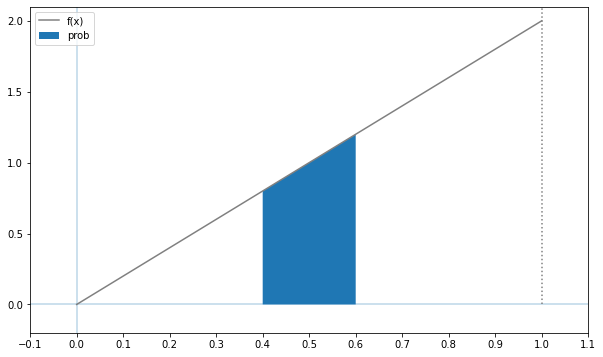

In [17]:
xs = np.linspace(x_range[0], x_range[1], 100)
xs

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 확률함수 그래프
ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray') # [f(x) for x in xs] : y값 의미



#ax.hlines(y, xmin, xmax, alpha=)
ax.hlines(0, -0.2, 1.2, alpha=0.3)

#ax.vlines(x, ymin, ymax, alpha=)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')


# 0.4부터 0.6까지 x좌표를 준비
xs_p = np.linspace(0.4,0.6,100)
#xs_p의 범위로 f(x)와 x축으로 둘러 싸인 영역을 진하게 칠함
ax.fill_between(xs_p,[f(x) for x in xs_p], label='prob')


ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()


## plt.fill_between() 함수

Text(0.5, 0, 'X-Label')

Text(0, 0.5, 'Y-Label')

([2, 3], [4, 9])

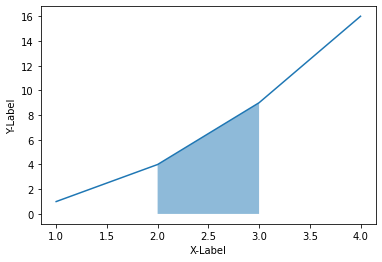

In [18]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

plt.plot(x, y)
plt.xlabel('X-Label')
plt.ylabel('Y-Label')
plt.fill_between(x[1:3], y[1:3], alpha=0.5)                   ## fill_between() 사용
x[1:3], y[1:3]
# 네 점 (x[1], y[1]), (x[2], y[2]), (x[1], 0), (x[2], 0)을 잇는 영역이 채워짐

plt.show()


## 연속형 확률변수의 확률의 성질

![](../picture/확률성질.png)

## 연속형 확률변수 첫번째 성질 -  함수 f(x) >= 0
- 위 성질을 확인하기 위해서는 minmize_scalar 함수 사용
- minimize_scalar(함수) : 함수를 실행한 결과값이 최소가 되는 x값과 최소결과 y를 반환

In [25]:
from scipy.optimize import minimize_scalar

def func(x):
    return (x-1.5)**2 + 0.5

res = minimize_scalar(func)
res.x # 최소값을 만들어낸 x값
res.fun # 함수가 만들어낼 수 있는 최소값

func(1.5)

1.5

0.5

0.500

In [24]:
# 위에서 생성해 놓은 불공정 룰렛의 확률함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0


In [27]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.x
res.fun # 0이 반환되므로 첫번째 확률의 성징을 만족

-1.6180339754913822

0

- 위  연산의 확인으로 인해 f(x)>= 0 의 연속형 확률변수의 성질이 만족됨

## 연속형 확률변수 두번째 성질

![](../picture/확률성질2.png)

![](../picture/20210722_111314.png)


- 두번째 f(x)를 －∞ 부터 ∞ 까지 적분한 결과가 1이라는 것은 위 그림에서 삼각형의 면적이 1이 되는 것과 같다
    - 이 삼각형은 밑변의 길이가 1, 높이가 2 이므로 면적이 1이라는 것을 간단히 알 수 있음


## 연속형 확률변수 두번째 성질인 수치적분 함수를 사용해 만족 여부 확인

## quad() - 수치적분  함수

- **수치적분(numerical integration)**은 함수를 아주 작은 구간으로 나누어 실제 면적을 계산함으로써 정적분의 값을 구하는 방법이다. 
- Scipy의 integrate 서브패키지의 quad 명령으로 수치적분을 할 수 있다.

- 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
- 첫번째 반환값이 수치 적분으로 얻어진 결과이며, 두번째의 값은 추정 오차


In [32]:
# 두번째 성징르 적분 계산으로 확인
# -무한대와 +무한대는 np.inf

integrate.quad(f,-np.inf,np.inf) # 결과값 1

(1.000, 0.000)

![](../picture/20210722_111314.png)


- 위 사다리꼴 영역을 적분으로 구하는 식
![](../picture/적분식.png)

In [36]:
# 2x는 함수 f(x)가 구현하고 있음
integrate.quad(f,0.4,0.6)

# 적분값이 0.200이므로 0.4에서 0.6이 나타날 확률은 0.2

(0.200, 0.000)

## 누적 분포 함수
- X가 x이하가 될 때 확률을 반환하는 함수
![](../picture/누적분.png)

In [40]:
## 분포함수 구현

def F(x):
    return integrate.quad(f,-np.inf,x)[0] #[0]적분함수는 값을 2개를 반환함

- 룰렛 0.4에서 0.6 사이의 값을 취할 활률
![](../picture/누적분2.png)

In [70]:
F(0.6) - F(0.4)

0.200

- 위 분포 함수 F(x)를 그래프로 그려보면 반드시 단조 증가함수(x가 증가할 때 y는 감소하지 않는 함수)가 됨


(-0.100, 1.100)

(-0.100, 1.100)

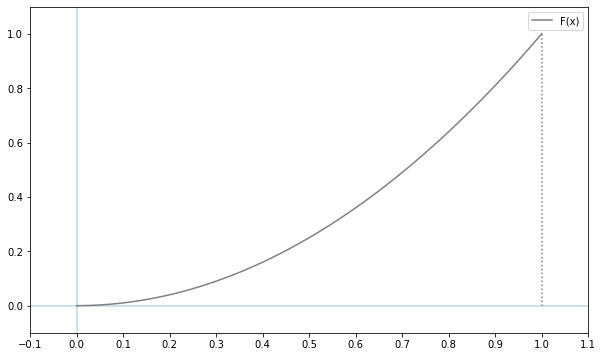

In [71]:
# 단조 증가 함수확인

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()


## 연속형 확률분포의 지표
- 평균 - 기대갑스
![](../picture/연속기대.png)

In [72]:
# 위에서 생성해 놓은 불공정 룰렛의 확률함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0


In [73]:
def integrand(x): # 계산 결과를 반환하는 함수
    return x*f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [85]:
# 확률변수 X를 정의
X = [x_range, f]

In [80]:
def E(X, g=lambda x: x) :
    x_range, f = X
    def integrand(x) : # (x(fx)) 계산 결과를 반환하는 함수
        return g(x)* f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]


In [84]:
E(X)

0.667

In [89]:
E(X, g=lambda x : 2*x+3)

4.333

In [90]:
2*E(X) + 3

4.333

## 분산
- μ 는 확률변수 X의 기대값
![](../picture/분산.png)


In [98]:
# 확률변수 X에 대한 분산계산
mean = E(X) # 확률변수에 X에 대한 rleorkqt

def integrand(x):
    return (x-mean)**2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

![](../picture/분산식.png)

In [105]:
# 위의 식 함수 구현
def V(X, g=lambda x:x):
    x_range, f=X
    mean = E(X,g)
    
    def integrand(x):
        return (g(x)-mean)**2 *f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0] #적분값은 첫번째 인수로 반환되서


In [106]:
V(X)

0.056

In [107]:
#확률변환변수의 식
V(X, lambda x: 2*x+3)

0.222

In [ ]:
#이산형 확률 변수에서 확인했던 분산의 성질은 연속형 확률 변수에도 적용
#성질에 따라 아래 수식으로도 계산 가능

In [108]:
2**2*V(X)

0.222